In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
sns.despine()
plt.rc('figure', figsize=(20,10))
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from matplotlib import pyplot

## Loading csv file into pandas dataframe 

In [2]:
df = pd.read_csv('energydata_complete.csv')

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Renaming columns 

In [4]:
Column_names = {'Appliances': 'appliances(Wh)', 'lights':'lights(Wh)', 'T1':'Kitchen temperature', 'RH_1':'Kitchen humidity', 'T2':'living-room temperature', 'RH_2':'living-room humidity', 'T3':'laundry-room temperature', 'RH_3':'laundry-room humidity', 'T4':'office-room temperature', 'RH_4': 'office-room humidity', 'T5':'bathroom temperature','RH_5':'bathroom humidity', 'T6':'northside-outdoor temperature', 'RH_6': 'northside-outdoor humidity', 'T7':'ironing-room temperature', 'RH_7': 'ironing-room humidity', 'T8': 'teenager-room temperature', 'RH_8': 'teenager-room humidity', 'T9': 'parents-room temperature', 'RH_9': 'parents-room humidity', 'T_out': 'outside temperature', 'RH_out': 'outside humidity', 'Press_mm_hg': 'pressure', 'Windspeed': 'windspeed', 'Visibility': 'visibility', 'Tdewpoint': 't-dew-point', 'date': 'date-time'}
df = df.rename(columns=Column_names)
df.head()

,date-time,appliances(Wh),lights(Wh),Kitchen temperature,Kitchen humidity,living-room temperature,living-room humidity,laundry-room temperature,laundry-room humidity,office-room temperature,...,parents-room temperature,parents-room humidity,outside temperature,pressure,outside humidity,windspeed,visibility,t-dew-point,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Checking for Null and duplicates 

In [5]:
assert df.isnull().values.sum()==0
assert df.duplicated().any()==False

## Plotting correlation matrix 

In [6]:
%matplotlib inline 

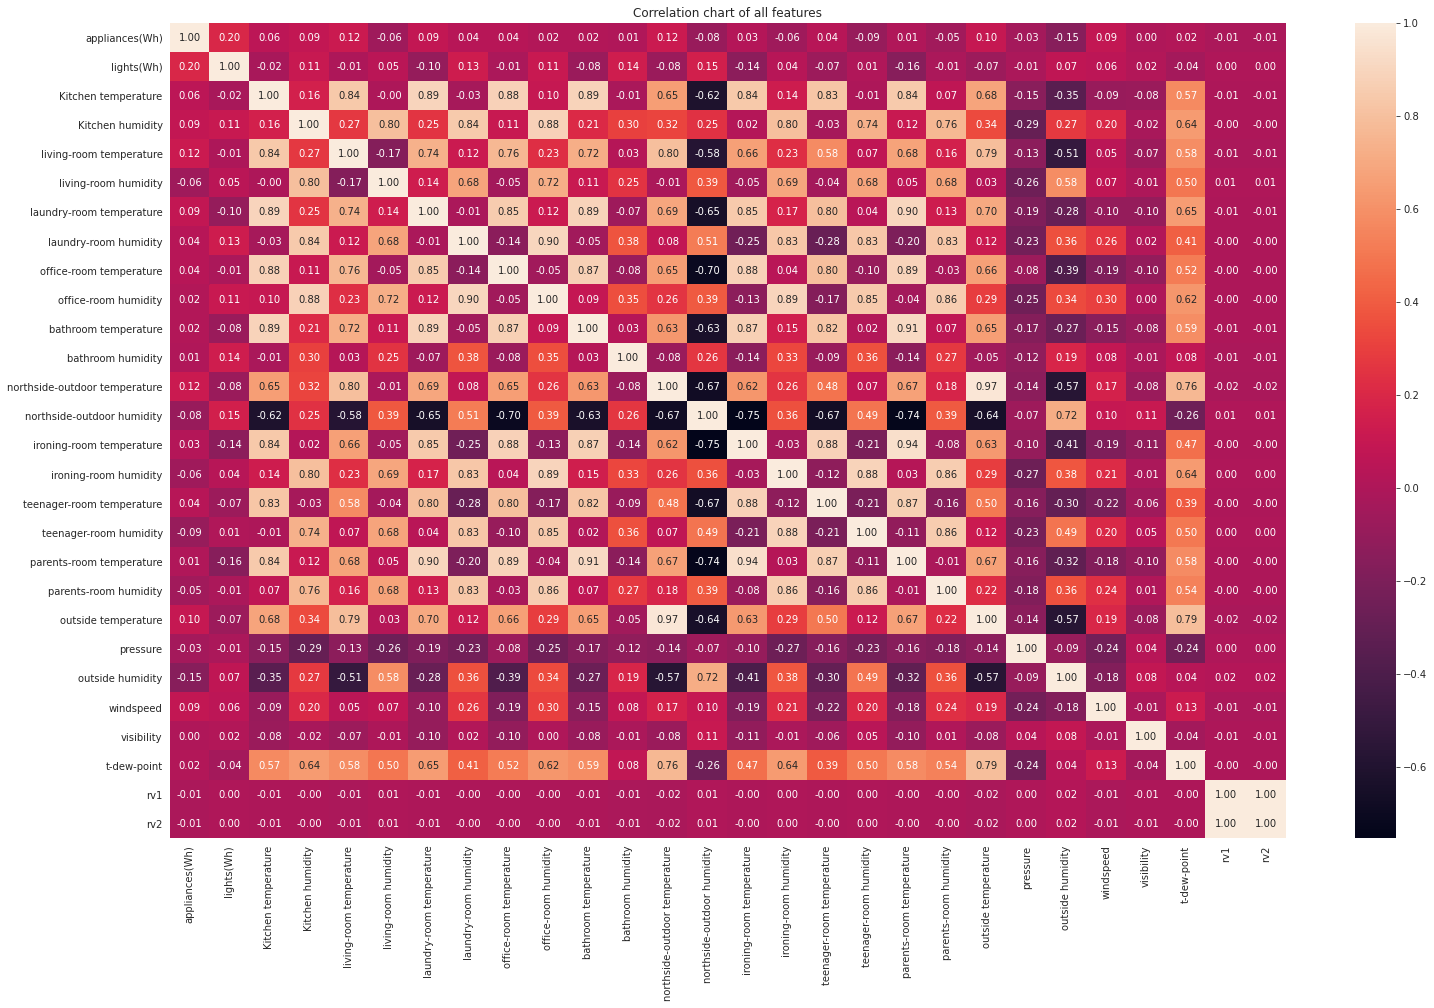

In [7]:
with sns.axes_style("whitegrid"):
    df;ax=plt.subplots(figsize=(25,15))
    ax=sns.heatmap(df.drop(['date-time'],axis=1).corr(),annot=True,fmt='.2f')
    plt.title('Correlation chart of all features')
 

## Relation within outside temperature to temperature taken within the house 

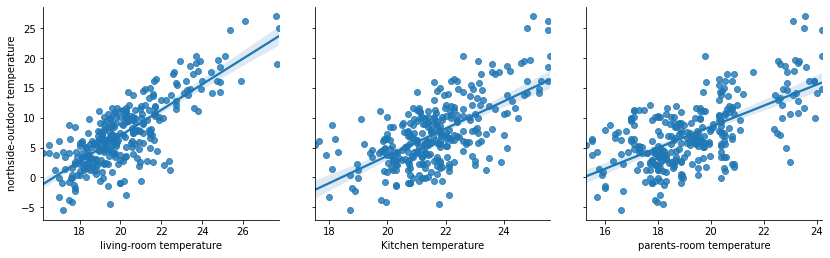

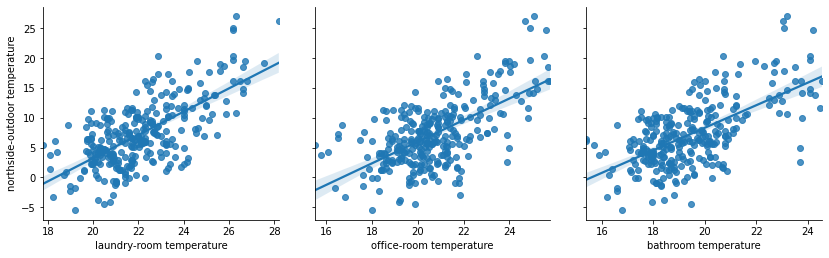

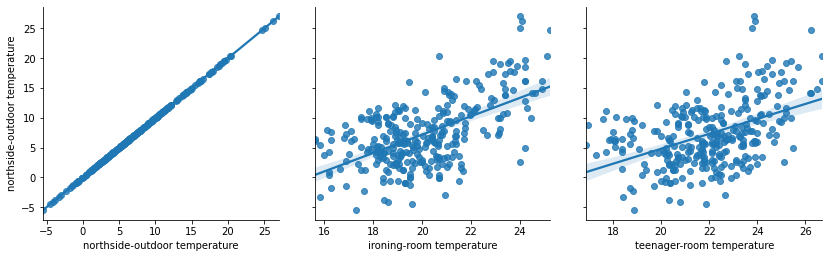

In [8]:
plot_columns = ['living-room temperature', 'Kitchen temperature', 'parents-room temperature',
                'laundry-room temperature', 'office-room temperature', 'bathroom temperature',
                'northside-outdoor temperature', 'ironing-room temperature', 'teenager-room temperature']

plot_data = df[plot_columns].sample(300, random_state=1)
g_1 = sns.PairGrid(plot_data, y_vars=['northside-outdoor temperature'], x_vars=plot_columns[0:3], height=4, layout_pad=2)
g_2 = sns.PairGrid(plot_data, y_vars=['northside-outdoor temperature'], x_vars=plot_columns[3:6], height=4, layout_pad=2)
g_3 = sns.PairGrid(plot_data, y_vars=['northside-outdoor temperature'], x_vars=plot_columns[6:9], height=4, layout_pad=2)
g_1.map(sns.regplot)
g_2.map(sns.regplot)
g_3.map(sns.regplot)

## Time and Energy 

In [9]:
months_of_year = ['January', 'February', 'March', 'April', 'May']
days_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
# Change date-time field to python datetime object.
df['date-time'] = pd.to_datetime(df['date-time'], format='%Y-%m-%d %H:%M:%S')
# Make sure we're able to sort according to month of the year
df['month'] = df['date-time'].dt.month_name()
df['month'] = pd.Categorical(df['month'], months_of_year) 
# Make sure we're able to sort according to day of week
df['week'] = df['date-time']
df['week'] = pd.Categorical(df['week'], days_of_week) 

df['hour'] = df['date-time'].dt.hour
df.head()

,date-time,appliances(Wh),lights(Wh),Kitchen temperature,Kitchen humidity,living-room temperature,living-room humidity,laundry-room temperature,laundry-room humidity,office-room temperature,...,pressure,outside humidity,windspeed,visibility,t-dew-point,rv1,rv2,month,week,hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,January,NaN,17
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,January,NaN,17
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,January,NaN,17
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,January,NaN,17
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,January,NaN,17


## how energy is used per month, against our target variable (appliance (Wh)), amongst others:

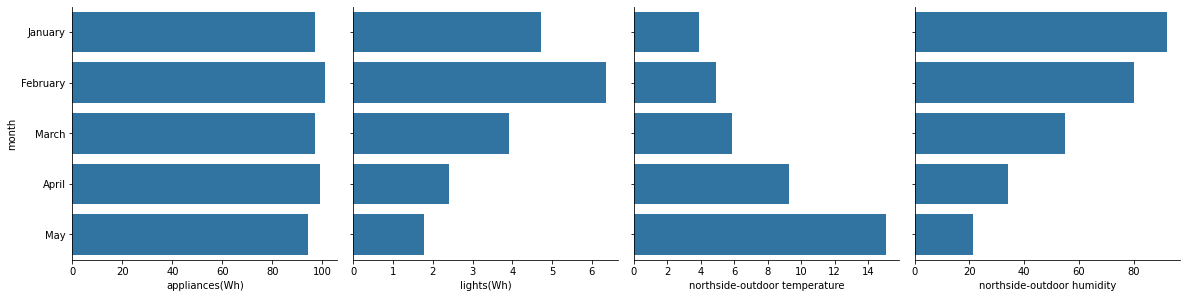

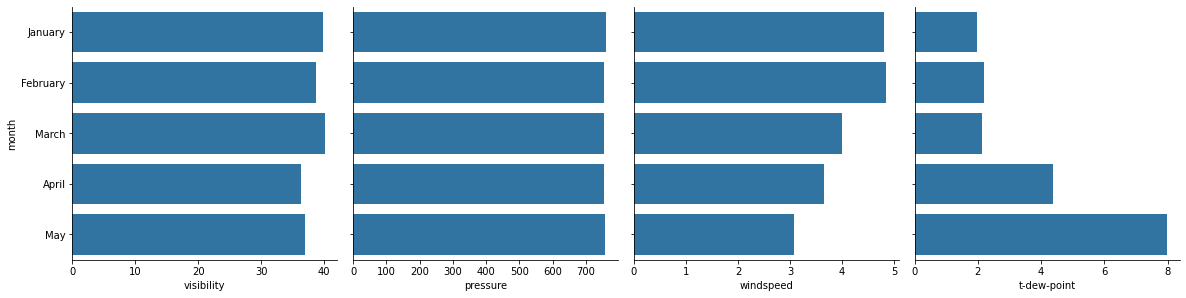

In [10]:
months = df['month'].unique()
appliance_data = df.groupby('month')['appliances(Wh)'].mean()
lights_data = df.groupby('month')['lights(Wh)'].mean()
visibility_data = df.groupby('month')['visibility'].mean()
outdoor_data_temp = df.groupby('month')['northside-outdoor temperature'].mean()
outdoor_data_hum = df.groupby('month')['northside-outdoor humidity'].mean() 
visibility_data = df.groupby('month')['visibility'].mean()
pressure_data = df.groupby('month')['pressure'].mean()
windspeed_data = df.groupby('month')['windspeed'].mean()
tdewpoint_data = df.groupby('month')['t-dew-point'].mean() 
concat_list = [
    appliance_data, lights_data, outdoor_data_temp, outdoor_data_hum, 
    visibility_data, pressure_data, windspeed_data, tdewpoint_data
]


monthly_data = pd.concat(concat_list, axis=1).reset_index()
data_list = [
    'appliances(Wh)', 'lights(Wh)', 'northside-outdoor temperature', 
    'northside-outdoor humidity', 'visibility', 'pressure', 'windspeed', 
    't-dew-point'
]
monthly_plot_1 = sns.PairGrid(
    monthly_data, 
    x_vars=data_list[:4],
    y_vars=['month'], 
    height=4
)
monthly_plot_1.map(sns.barplot)
monthly_plot_2 = sns.PairGrid(
    monthly_data, 
    x_vars=data_list[4:8],
    y_vars=['month'], 
    height=4
)
monthly_plot_2.map(sns.barplot)

In [11]:
def plot_heat_map_energy(df, column, title):
    """
    Helper function to create heatmap of energy use during day and hours.
    """
    months_of_year = ['January', 'February', 'March', 'April', 'May']

    fig, axs = plt.subplots(2, 3, figsize=(20,20))
    fig.suptitle(title, fontsize=18)
    for ax, month in zip(axs.flatten(), months_of_year):
        weekly_data = df[df['month'] == month][['week', 'hour', column]]
        weekly_data = pd.pivot_table(weekly_data, values=column, index=['hour'], columns=['week'])
        ax.set(title=month)
        sns.heatmap(weekly_data, square=True, ax=ax, cmap='OrRd', linewidth=1)
    axs.flat[-1].set_visible(False)

ValueError: zero-size array to reduction operation fmin which has no identity

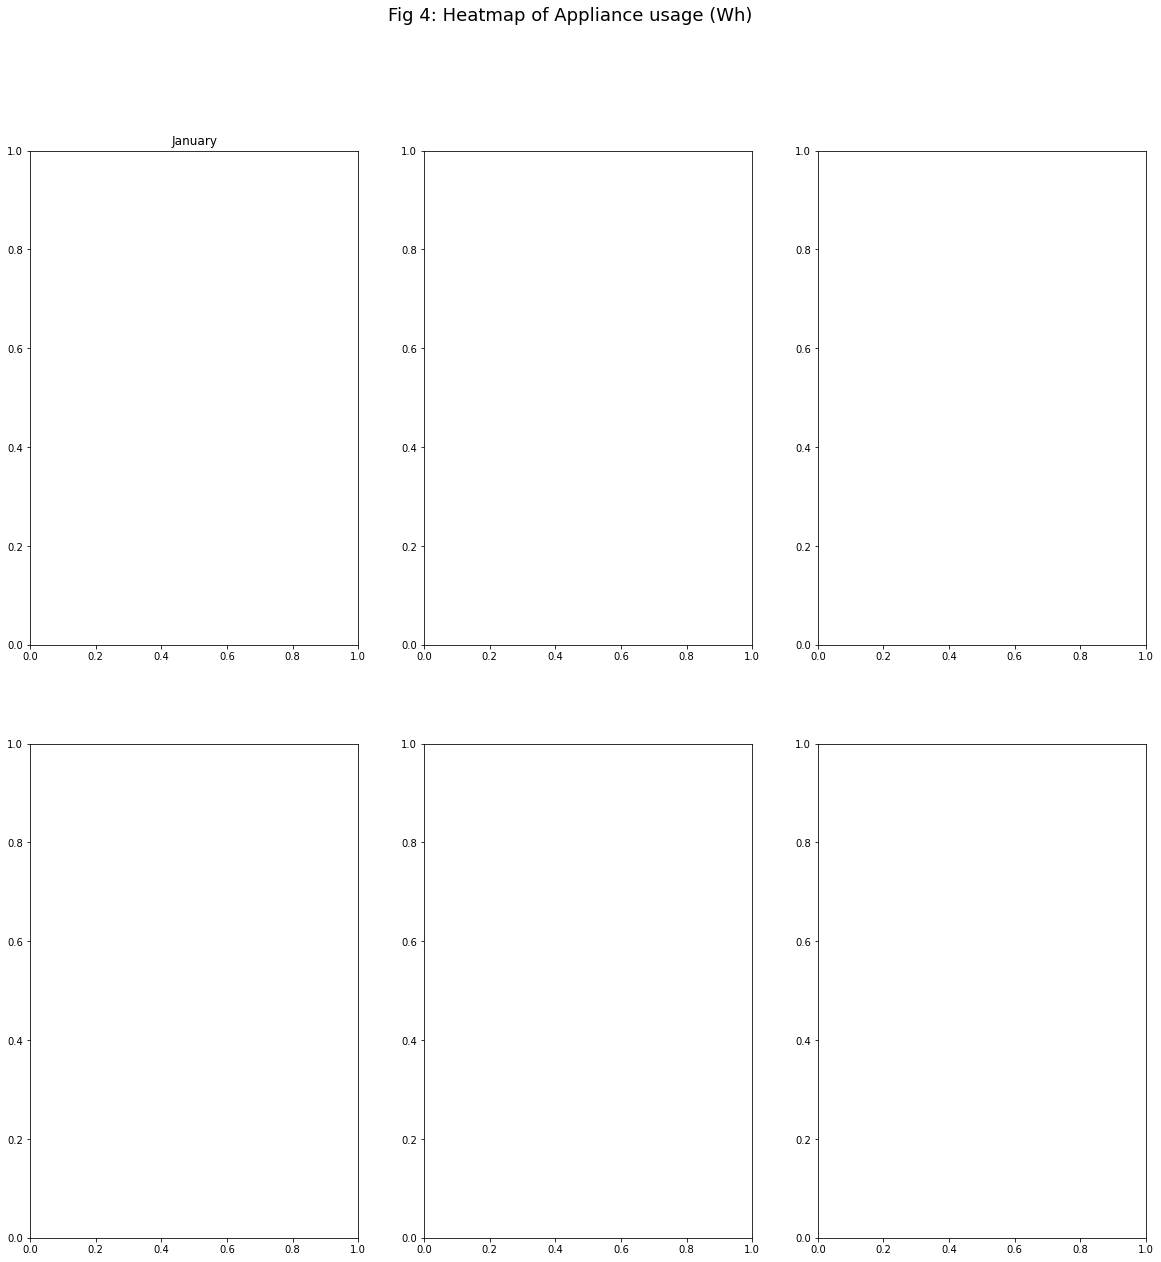

In [12]:
plot_heat_map_energy(df, 'appliances(Wh)', 'Fig 4: Heatmap of Appliance usage (Wh)')

ValueError: zero-size array to reduction operation fmin which has no identity

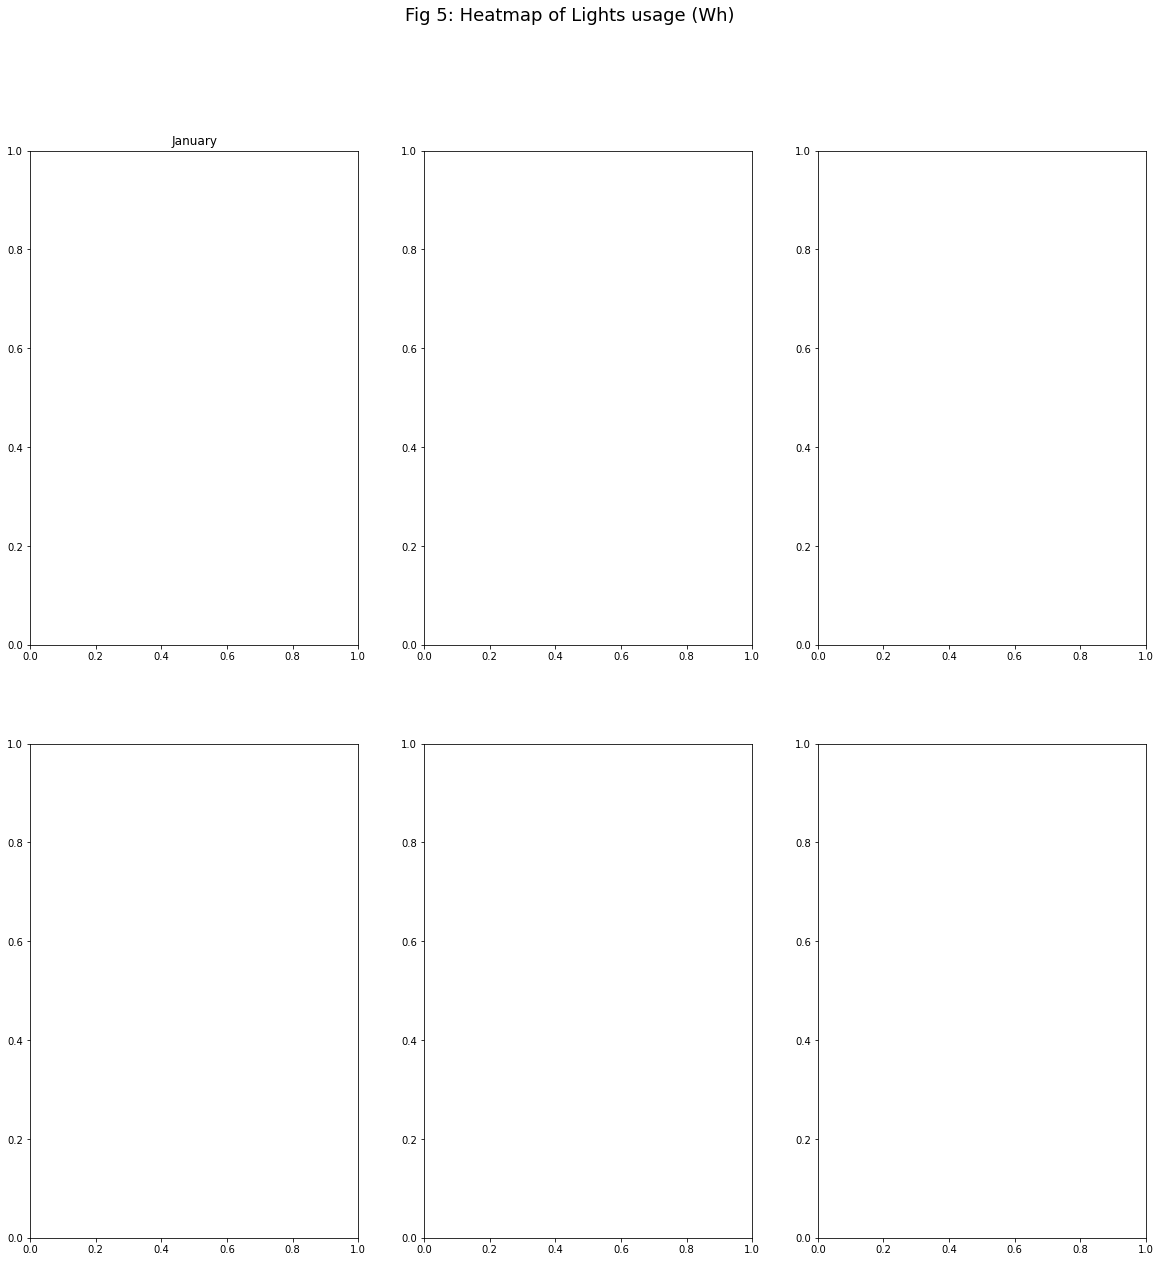

In [13]:
plot_heat_map_energy(df, 'lights(Wh)', 'Fig 5: Heatmap of Lights usage (Wh)')

## Machine learning
exploring machine learning techniques to predict our target variable, appliances(Wh):
using various metrics such as Mean Absolute Error, R-squared, amongst others.
test data would be 30% of the entire dataset.
exploring the use of derived features such as month, week, and hour from the date-time feature.
Also exploring LinearRegression and RandomForestRegression techniques.


In [14]:
# transforming categorical features month and week to numerical variables 
from sklearn.preprocessing import LabelEncoder

month_enc = LabelEncoder()
week_enc = LabelEncoder()

df['month'] = month_enc.fit_transform(df['month'])
df['week'] = week_enc.fit_transform(df['week'])

In [15]:
## correlation coefficient between target variable and other variables 
df.corr()['appliances(Wh)'].abs().sort_values()

visibility                       0.000230
bathroom humidity                0.006955
parents-room temperature         0.010010
rv2                              0.011145
rv1                              0.011145
t-dew-point                      0.015353
office-room humidity             0.016965
month                            0.018494
bathroom temperature             0.019760
ironing-room temperature         0.025801
pressure                         0.034885
laundry-room humidity            0.036292
teenager-room temperature        0.039572
office-room temperature          0.040281
parents-room humidity            0.051462
Kitchen temperature              0.055447
ironing-room humidity            0.055642
living-room humidity             0.060465
northside-outdoor humidity       0.083178
laundry-room temperature         0.085060
Kitchen humidity                 0.086031
windspeed                        0.087122
teenager-room humidity           0.094039
outside temperature              0

## Feature Elimination 

In [16]:
target_features = ['appliances(Wh)']
invalid_features = ['date-time', 'week']
low_corr_features = [
    'visibility',
    'bathroom humidity',
    'parents-room temperature',
    'rv1',
    'rv2',
    't-dew-point',
    'office-room humidity',
    'month',
    'bathroom temperature',
    'ironing-room temperature',
    'pressure',
    'laundry-room humidity',
    'teenager-room temperature',
    'office-room temperature',
    'parents-room humidity',
    'Kitchen temperature',
    'ironing-room humidity',
    'living-room humidity',
]
exempt_features = target_features + invalid_features + low_corr_features

## Training/Test Models 

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

features_df = df.drop(columns=exempt_features)
targets_df = df['appliances(Wh)']

x_train, x_test, y_train, y_test = train_test_split(features_df, targets_df, test_size=0.3, random_state=42)

rf = LinearRegression()
rf.fit(x_train, y_train)

LinearRegression()

In [18]:
## predictions 
predictions = rf.predict(x_test)
print (predictions)

[ 37.68966269 183.49402558  63.95297324 ...  94.72656815 193.35161743
  64.69380088]


## Measuring performance 

In [19]:
from sklearn import metrics
def get_performance(actual, predicted, dp=3):
    """
    Returns the performance metric value for a target value against its predicted value.
    
    Metrics:
        - MAE: Mean Absolute Error
        - RSS: Residual Sum of Squares
        - RMSE: Root Mean Squared Error
        - RSQUARED: R-Sqaured Score
    """
    mae = metrics.mean_absolute_error(actual, predicted)
    print("Mean Absolute Error (MAE): ", round(mae, dp))
    rss = np.sum(np.square(actual - predicted))
    print("Residual Sum of Squares (RSS): ", round(rss, dp))
    mse = metrics.mean_squared_error(actual, predicted)
    print("Mean Squared Error: ", round(mse, dp))
    rmse = np.sqrt(mse)
    print("Root Mean Squared Error: ", round(rmse, dp))
    rsquared = metrics.r2_score(actual, predicted)
    print("R squared score: ", round(rsquared, dp))
    
    return {'mae': mae, 'rss': rss, 'mse': mse, 'rmse': rmse, 'rsquared': rsquared}

In [20]:
get_performance(y_test, predictions)

Mean Absolute Error (MAE):  54.598
Residual Sum of Squares (RSS):  53214466.652
Mean Squared Error:  8987.412
Root Mean Squared Error:  94.802
R squared score:  0.128


{'mae': 54.59789982961498,
 'rss': 53214466.65230914,
 'mse': 8987.41203383029,
 'rmse': 94.80196218343949,
 'rsquared': 0.12765776297861353}

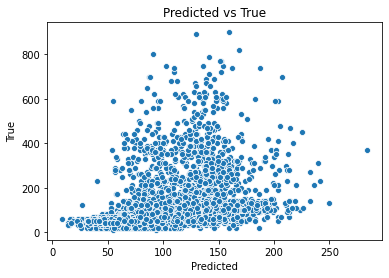

In [21]:
##predicted vs true plot 
sns.scatterplot(predictions, y_test)
plt.title('Predicted vs True')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Normalization

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
drop_df = df.drop(columns=invalid_features)
normalised_df = pd.DataFrame(scaler.fit_transform(drop_df), columns=drop_df.columns)

features_df = normalised_df.drop(columns=low_corr_features + target_features)
targets_df = normalised_df['appliances(Wh)']

x_train, x_test, y_train, y_test = train_test_split(features_df, targets_df, test_size=0.3, random_state=1)

normalised_rf = LinearRegression()
normalised_rf.fit(x_train, y_train)

LinearRegression()

In [23]:
##prediction of normalisation
normalised_pred = normalised_rf.predict(x_test)
print(normalised_pred)

[0.03202917 0.13239721 0.09964697 ... 0.12174492 0.10568058 0.09757437]


In [24]:
## Normalisation performance
get_performance(y_test, normalised_pred)


Mean Absolute Error (MAE):  0.051
Residual Sum of Squares (RSS):  47.525
Mean Squared Error:  0.008
Root Mean Squared Error:  0.09
R squared score:  0.13


{'mae': 0.05107991754538396,
 'rss': 47.52483293834377,
 'mse': 0.00802648757614318,
 'rmse': 0.0895906667914866,
 'rsquared': 0.13033237167837664}

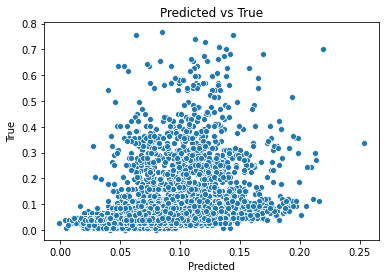

In [25]:
## normalisation predicted vs true plot 
sns.scatterplot(normalised_pred, y_test)
plt.title('Predicted vs True')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Ridge and Lasso Regression 

In [26]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

features_df = normalised_df.drop(columns=target_features)
targets_df = normalised_df['appliances(Wh)']

x_train, x_test, y_train, y_test = train_test_split(features_df, targets_df, test_size=0.3, random_state=1)

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [27]:
## ridge and lasso regression prediction
linear_reg_pred = linear_reg.predict(x_test)
ridge_reg_pred = ridge_reg.predict(x_test)
lasso_reg_pred = lasso_reg.predict(x_test)## 

In [28]:
## ridge and lasso performance 
print('Performance for Linear Regression:')
get_performance(y_test, linear_reg_pred)
print('***********************************')
print('Performance for Ridge Regression:')
get_performance(y_test, ridge_reg_pred)
print('***********************************')
print('Performance for Lasso Regression:')
get_performance(y_test, lasso_reg_pred)

Performance for Linear Regression:
Mean Absolute Error (MAE):  0.049
Residual Sum of Squares (RSS):  45.09
Mean Squared Error:  0.008
Root Mean Squared Error:  0.087
R squared score:  0.175
***********************************
Performance for Ridge Regression:
Mean Absolute Error (MAE):  0.049
Residual Sum of Squares (RSS):  45.116
Mean Squared Error:  0.008
Root Mean Squared Error:  0.087
R squared score:  0.174
***********************************
Performance for Lasso Regression:
Mean Absolute Error (MAE):  0.052
Residual Sum of Squares (RSS):  50.609
Mean Squared Error:  0.009
Root Mean Squared Error:  0.092
R squared score:  0.074


{'mae': 0.05225691009408597,
 'rss': 50.60904582917355,
 'mse': 0.008547381494540374,
 'rmse': 0.0924520497043758,
 'rsquared': 0.07389366491876082}

## ridge and lasso prediction vs residual plot 

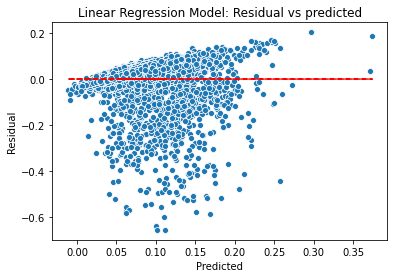

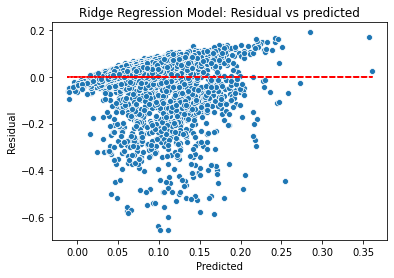

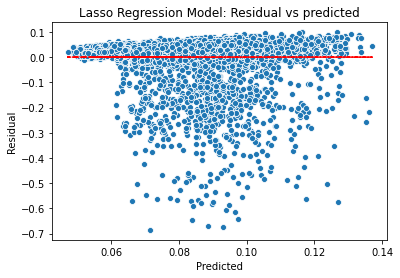

In [33]:
def plot_residual(pred, true, model_type):
    """
    Helper function to draw residual plot.
    """
    residual = pred - true
    sns.scatterplot(pred, residual)
    plt.title('%s Model: Residual vs predicted' % (model_type))
    plt.xlabel('Predicted')
    plt.ylabel('Residual')
    plt.plot(pred, [0 for _ in range(len(residual))], 'r--')
    plt.show()
    
plot_residual(linear_reg_pred, y_test, 'Linear Regression')
plot_residual(ridge_reg_pred, y_test, 'Ridge Regression')
plot_residual(lasso_reg_pred, y_test, 'Lasso Regression')

In [34]:
def get_weights_df(model, feat, col_name):
    """
    This function returns the weight of every feature.
    
    Source: https://gist.github.com/HamoyeHQ/3fd7570f8bf390ee9b9f7f042271d9f9
    """
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [35]:
linear_model_weights = get_weights_df(linear_reg, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')

In [36]:
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,living-room humidity,-0.417054,-0.367584,-0.000000
1,outside temperature,-0.317204,-0.248553,0.000000
2,living-room temperature,-0.215668,-0.178002,0.000000
3,parents-room temperature,-0.131155,-0.129445,-0.000000
4,teenager-room humidity,-0.101133,-0.100066,-0.000000
5,outside humidity,-0.075244,-0.048618,-0.024428
6,ironing-room humidity,-0.039516,-0.040837,-0.000000
7,office-room temperature,-0.038924,-0.040195,-0.000000
8,office-room humidity,-0.032203,-0.033614,0.000000
9,Kitchen temperature,-0.022651,-0.039607,0.000000


## Lasso weight 

In [37]:
lasso_weights_df[lasso_weights_df['Lasso_weight'] != 0]

,Features,Lasso_weight
0,outside humidity,-0.024428
1,month,-0.000395
26,laundry-room temperature,0.006564
27,hour,0.043280
28,lights(Wh),0.067836


## ridge weight

In [38]:
ridge_weights_df.reindex(ridge_weights_df.Ridge_Weight.abs().sort_values(ascending=False).index)

,Features,Ridge_Weight
28,Kitchen humidity,0.443105
0,living-room humidity,-0.367584
27,laundry-room temperature,0.299697
1,outside temperature,-0.248553
26,northside-outdoor temperature,0.219476
2,living-room temperature,-0.178002
25,lights(Wh),0.132904
3,parents-room temperature,-0.129445
4,teenager-room humidity,-0.100066
24,laundry-room humidity,0.089385


## Quiz 

In [50]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## Simple Linear regression¶
(T2 as input, T6 as output)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df = df.drop(['date', 'lights'], axis=1)
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [52]:
#split normalized data into training and test sets based on required variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(normalised_df['T2'], normalised_df['T6'], test_size= 0.3 , random_state= 42)

In [53]:
#reshape training and test data for ease of use and fit linear regression on test after learning with training

x_train, y_train, x_test, y_test = x_train, y_train, x_test, y_test
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
predicted_values = linear_model.predict(x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[0.12284953 0.18899927 0.0574267  ... 0.15265326 0.31504725 0.27550279].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [44]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score, 2)

NameError: name 'predicted_values' is not defined